# Python 與機器學習（2）

## 郭耀仁

## 課程內容

- 分類問題
    - 羅吉斯迴歸
    - 感知器
    - 支持向量機
    - 決策樹
    - K 最近鄰
    - 整體學習
- 分群問題

# 羅吉斯迴歸

## 羅吉斯迴歸

- 我們從 Logistic Regression 羅吉斯迴歸開始
- 雖然有迴歸兩個字，但其實是個分類器
- 處理二元分類問題
    - Hot dog(1)/Not hot dog(0)
    - 垃圾(1)/非垃圾郵件(0)
    - 詐欺(1)/非詐欺交易(0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_arr_1, x_arr_2 = np.arange(1, 6), np.arange(7, 12)
y_arr_1, y_arr_2 = np.zeros(5), np.ones(5)
plt.scatter(np.concatenate([x_arr_1, x_arr_2]), np.concatenate([y_arr_1, y_arr_2]), marker = 'x', color = 'r')
plt.yticks([0, 1], ["Negative(0)", "Positive(1)"])
plt.xticks([])
plt.axhline(y = 0.5, c = 'k', ls = '--', linewidth = 3)

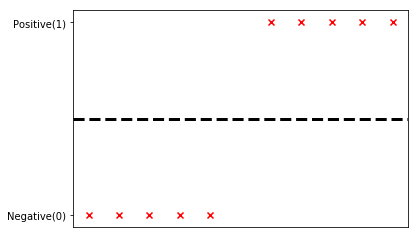

In [2]:
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x_arr_1, x_arr_2 = np.arange(1, 6), np.arange(7, 12)
y_arr_1, y_arr_2 = np.zeros(5), np.ones(5)
plt.scatter(np.concatenate([x_arr_1, x_arr_2]), np.concatenate([y_arr_1, y_arr_2]), marker = 'x', color = 'r')
plt.yticks([0, 1], ["Negative(0)", "Positive(1)"])
plt.xticks([])
plt.plot([0, 12], [0, 1], c = 'k', ls = '--', linewidth = 3)

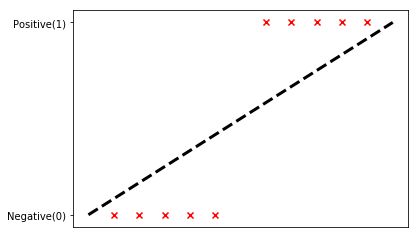

In [4]:
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_fun(x):
    return 1 / (1 + np.exp(-x))

x_arr_1, x_arr_2 = np.arange(-12, -7), np.arange(7, 12)
y_arr_1, y_arr_2 = np.zeros(5), np.ones(5)
plt.scatter(np.concatenate([x_arr_1, x_arr_2]), np.concatenate([y_arr_1, y_arr_2]), marker = 'x', color = 'r')
plt.xticks([])
plt.yticks([0, 1], ["Negative(0)", "Positive(1)"])
x = np.linspace(-12, 12)
y = sigmoid_fun(x)
plt.plot(x, y, c = "k", linewidth = 3, linestyle = "--", alpha = 0.3)

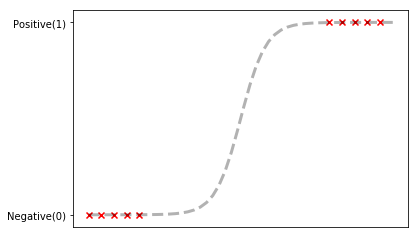

In [6]:
plt.show()

## 羅吉斯迴歸（2）

- 我們需要將 $\theta^{T}x$ 輸出的值域轉換至 0 到 1 之間
- 透過 $g$ 函數，也就是 sigmoid function

$$g(z) = \frac{1}{1+e^{-z}}$$
$$h(x) = g(\theta^{T}x) = \frac{1}{1 + e^{-\theta^{T}x}}$$

## 羅吉斯迴歸（3）

- 接著我們再做一次轉換，決定 $g(z)$ 輸出的機率該如何轉換至 $\hat{y} \in {\{0, 1\}}$

$$  H(z)=
  \begin{cases}
    1       & \quad \text{if } z\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

$$\hat{y} =h(x)= H(g(\theta^{T}x))$$

## 羅吉斯迴歸（4）

- 流程：
    - 建立迴歸模型 $\theta^Tx$
    - 將 $\theta^Tx$ 作為 Sigmoid 函數的輸入，得到 $g(\theta^Tx)$
    - 將 $g(\theta^Tx)$ 作為 $H$ 的輸入，得到 $\hat{y}$

## 羅吉斯迴歸（5）

- Decision Boundary
    - $\theta^Tx$ > 0 的時候預測 $\hat{y} = 1$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_fun(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10)
y = sigmoid_fun(x)
plt.plot(x, y)
plt.xticks([]), plt.yticks([0, 0.5, 1])
ax = plt.gca() # get current axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.set_xlabel("$\\theta^Tx$")
plt.plot([0, 10], [0, 0], c = "r", linewidth = 5)

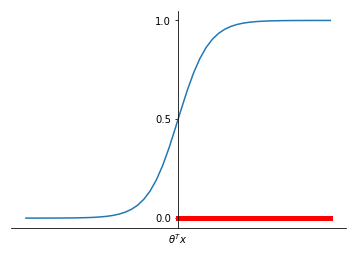

In [8]:
plt.show()

## 羅吉斯迴歸（5）

- Decision Boundary
    - $\theta^Tx$ < 0 的時候預測 $\hat{y} = 0$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_fun(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10)
y = sigmoid_fun(x)
plt.plot(x, y)
plt.xticks([]), plt.yticks([0, 0.5, 1])
ax = plt.gca() # get current axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.set_xlabel("$\\theta^Tx$")
plt.plot([0, -10], [0, 0], c = "r", linewidth = 5)

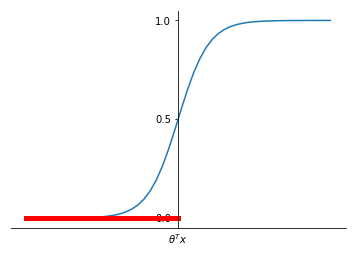

In [10]:
plt.show()

## 羅吉斯迴歸（6）

- 假如 $(\theta_0, \theta_1, \theta_2) = (-3, 1, 1)$：

$$\theta = \begin{bmatrix}
    -3 \\ 1 \\ 1
\end{bmatrix}$$

$$h(x) = \theta^{T}x = -3 + x_1 + x_2$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

x1_arr = np.linspace(0, 3, 100)
x_points = np.linspace(0, 3, 20)
x_points_len = int(len(x_points) / 2)
zero_x_points = np.array([0.5, 1.5, 2.5])
plt.scatter(zero_x_points, 3 - zero_x_points, c = "b")
plt.scatter([0.5, 1, 2], [0.5, 1.5, 0.5], c = "r")
plt.scatter([1.5, 2, 3], [2.5, 1.5, 2.5], c = "g", marker = "x")
plt.plot(x1_arr, 3 - x1_arr, c = 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.text(0.5, 1, "$\\theta^Tx < 0$", size = 14)
plt.text(2, 2, "$\\theta^Tx > 0$", size = 14)
plt.title("Decision Boundary")

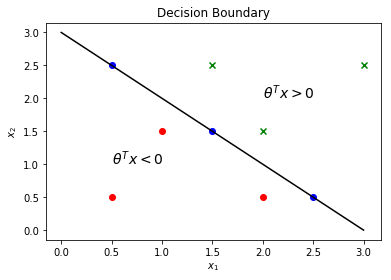

In [12]:
plt.show()

## 羅吉斯迴歸（7）

- 成本函數
- 使用跟迴歸問題不同的成本函數

$$J(h(x), y) =
  \begin{cases}
    -\log(h(x))  & \quad \text{if } y = 1\\
    -\log(1 - h(x))  & \quad \text{if } y = 0\\
  \end{cases}
$$

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 1, 0.01)
y1 = -np.log(x)
y2 = -np.log(1 - x)
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.title("$y = 1, -\log{h(x)}$")
plt.xlabel("$h(x)$")
plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.title("$y = 0, -\log{(1-h(x))}$")
plt.xlabel("$h(x)$")
plt.tight_layout()

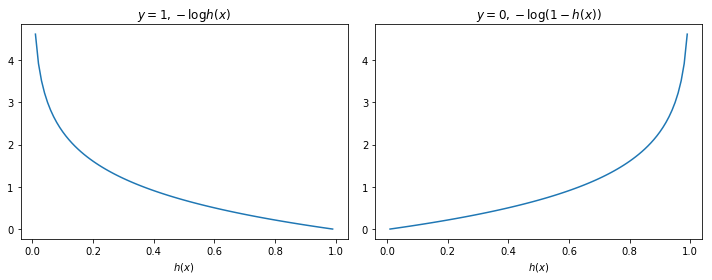

In [14]:
plt.show()

## 羅吉斯迴歸（8）

- 視覺化之後我們可以較清楚暸解 Logistic Regression 的成本函數意涵：
    - 當 y = 1 的時候，如果 $h(x)$ 預測是 0，則成本函數趨近無限大
    - 當 y = 0 的時候，如果 $h(x)$ 預測是 1，則成本函數趨近無限大

## 羅吉斯迴歸（9）

- 接著我們將成本函數整理並加入正規化係數：

$$\text{minimize}\quad J(h(x), y) = -\frac{1}{m}\sum_{i=1}^{m}[y\log(h(x)) + (1-y)\log(1-h(x))] + \frac{\lambda}{2m}\sum_{i=1}^{n}\theta_j^2$$

## 羅吉斯迴歸（10）

- 基於最小化這個成本函數的目標進行梯度遞減：

$$\text{minimize}\quad J(\theta^Tx, y) = -\frac{1}{m}\sum_{i=1}^{m}[y\log(\theta^Tx) + (1-y)\log(1-\theta^Tx)] + \frac{\lambda}{2m}\sum_{i=1}^{n}\theta_j^2$$

$$\theta_j := \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j} J(\theta)$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.sample(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.sample(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.sample(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, c = 'g', marker = '^', s = 200)
plt.scatter(x_arr[3:7], y_arr_2, c = 'b', marker = 's', s = 200)
plt.scatter(x_arr[7:], y_arr_3, c = 'r', marker = 'x', s = 200)

## 羅吉斯迴歸（11）

- 延伸二元分類到多元分類問題：One-vs-all

$$y \in {\{0, 1, 2\}}$$
$$h^{0}(x) = P(y = 0 \mid x; \theta)$$
$$h^{1}(x) = P(y = 1 \mid x; \theta)$$
$$h^{2}(x) = P(y = 2 \mid x; \theta)$$
$$\text{prediction:}\;\;max(h^{0}(x), h^{1}(x), h^{2}(x))$$

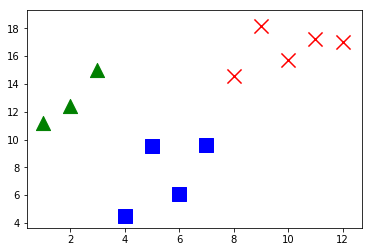

In [16]:
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.sample(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.sample(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.sample(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.figure(1, figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.scatter(x_arr[:3], y_arr_1, c = 'g', marker = '^', s = 200)
plt.scatter(x_arr[3:], np.concatenate([y_arr_2, y_arr_3]), c = 'k', marker = 'o', s = 200)
plt.plot([2, 5], [2, 18])
plt.subplot(1, 3, 2)
plt.scatter(x_arr[3:7], y_arr_2, c = 'b', marker = 's', s = 200)
plt.scatter(np.concatenate([x_arr[:3], x_arr[7:]]), np.concatenate([y_arr_1, y_arr_3]), c = 'k', marker = 'o', s = 200)
plt.plot([0, 15], [10, 12])
plt.subplot(1, 3, 3)
plt.scatter(x_arr[7:], y_arr_3, c = 'r', marker = 'x', s = 200)
plt.scatter(x_arr[:7], np.concatenate([y_arr_1, y_arr_2]), c = 'k', marker = 'o', s = 200)
plt.plot([5, 10], [20, 3])

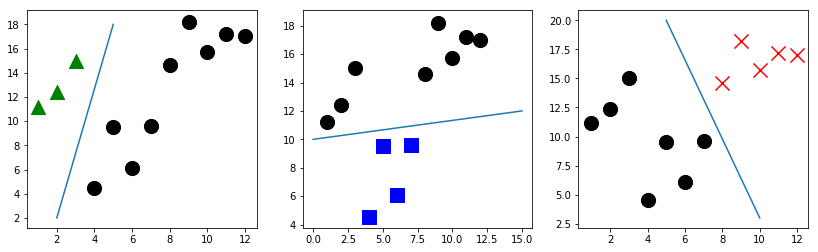

In [18]:
plt.show()

## 羅吉斯迴歸（12）

- 請 `sklearn` 幫我們找 $\theta_i$

In [19]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
x1_setosa, x2_setosa = X[:50, 0], X[:50, 2]
x1_versicolor, x2_versicolor = X[50:100, 0], X[50:100, 2]

plt.scatter(x = x1_setosa, y = x2_setosa, marker = "o", color = "red", label = "0")
plt.scatter(x = x1_versicolor, y = x2_versicolor, marker = "x", color = "green", label = "1")
plt.legend(loc = "upper left")
plt.xlim(x1_setosa.min() - 1, x1_versicolor.max() + 1)
plt.ylim(x2_setosa.min() - 1, x2_versicolor.max() + 1)

(0.0, 6.0999999999999996)

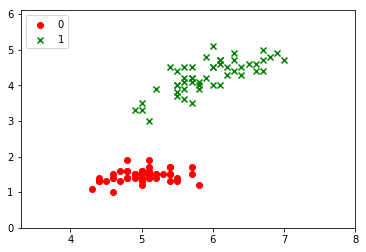

In [20]:
plt.show()

In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 決策區域圖
def plot_decision_region(X, y, classifier, resolution = 0.02):
    markers = ('o', 'x', '^')
    colors = ('red', 'green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

In [22]:
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]

lr = LogisticRegression()
lr.fit(X, y)
plot_decision_region(X, y, classifier = lr)
plt.legend(loc = "upper left")
plt.title("Logistic Regression")

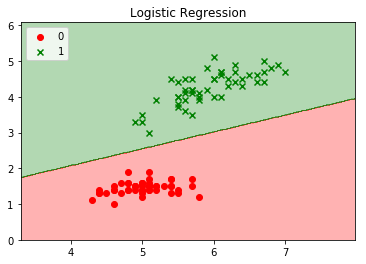

In [23]:
plt.show()

# 感知器

## 感知器

- 沒有經過 sigmoid 函數轉換的簡單分類器
- 其中 $\theta_0x_0$ 即為門檻值
- $\phi$ 函數就像是一個簡單版的 sign 函數

$$h(x) = \theta_0x_0 + \theta_1x_1 + ... + \theta_mx_m = \theta^Tx$$


$$
    \hat{y} = \phi(h(x)) =
    \begin{cases}
        1       & \quad \text{if } h(x)\geq 0\\
    0  & \quad \text{ohterwise.}\\
    \end{cases}
$$

## 感知器（2）

- 初始一個很小趨近於零的值給 $\theta$
- 利用真實答案 $y_i$ 與預測結果 $\hat{y_i}$ 的誤差更新 $\theta$

$$\theta_i:=\theta_i + \Delta \theta_i$$

$$\Delta \theta_i = \alpha(y_i - \hat{y_i})x_i$$

## 感知器（3）

- 正確的預測感知器不會修正權重 $\theta$

$$\Delta \theta_i = \alpha (1 - 1)x_i = 0$$
$$\Delta \theta_i = \alpha (0 - 0)x_i = 0$$

- 錯誤的預測會讓感知器修正權重 $\theta$ 藉此修正下一輪的預測結果

$$\Delta \theta_i = \alpha (1 - 0)x_i = \alpha (1) x_i$$
$$\Delta \theta_i = \alpha (0 - 1)x_i = \alpha (-1) x_i$$

## 感知器（4）

- 修正的方向：
    - $\Delta \theta_i = \alpha (1 - 0)x_i = \alpha (1) x_i$：$\theta$ 增大，更容易達成 $h(x) \geq 0$
    - $\Delta \theta_i = \alpha (0 - 1)x_i = \alpha (-1) x_i$：$\theta$ 增大，更容易達成 $h(x) < 0$

$$
    \hat{y} = \phi(h(x)) =
    \begin{cases}
        1       & \quad \text{if } h(x)\geq 0\\
    0  & \quad \text{ohterwise.}\\
    \end{cases}
$$

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
ppn = Perceptron()
ppn.fit(X, y)
plot_decision_region(X, y, classifier = ppn)
plt.legend(loc = "upper left")
plt.title("Perceptron Classifier")

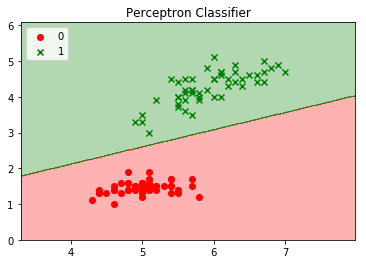

In [25]:
plt.show()

# 支持向量機

## 支持向量機

- 支持向量機，亦稱為最大邊界分類器
- 成本函數長得跟羅吉斯迴歸相似：

$$\text{minimize     }C\sum_{i=1}^{m}[ycost_1(\theta^Tx) + (1-y)cost_0(\theta^Tx)] + \frac{1}{2}\sum_{i=j}^{n}\theta_j^2$$

$$\text{where     }C = \frac{1}{\lambda}$$

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def cost_fun_1(x):
    if x < 1:
        return -x + 1
    else:
        return 0
def cost_fun_0(x):
    if x < -1:
        return 0
    else:
        return x + 1
x_arr_1 = np.linspace(-1, 3)
x_arr_2 = np.linspace(-3, 1)
y_arr_1 = list(map(cost_fun_1, x_arr_1))
y_arr_2 = list(map(cost_fun_0, x_arr_2))
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_arr_1, y_arr_1)
plt.xticks([-1, 0, 1])
plt.yticks([])
plt.title("$Cost_1(z)$")
plt.subplot(1, 2, 2)
plt.plot(x_arr_2, y_arr_2)
plt.xticks([-1, 0, 1])
plt.title("$Cost_0(z)$")
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

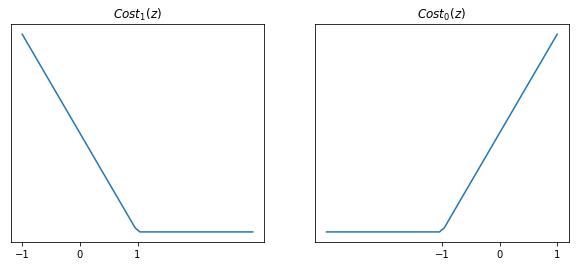

In [27]:
plt.show()

## 支持向量機（2）

- 當 $y = 1$ 時讓 $\theta^Tx \ge 1$：

$$\text{minimize     }C\sum_{i=1}^{m}[ycost_1(\theta^Tx)] + \frac{1}{2}\sum_{j=1}^{n}\theta_j^2$$

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def cost_fun_1(x):
    if x < 1:
        return -x + 1
    else:
        return 0
def cost_fun_0(x):
    if x < -1:
        return 0
    else:
        return x + 1
x_arr_1 = np.linspace(-1, 3)
x_arr_2 = np.linspace(-3, 1)
y_arr_1 = list(map(cost_fun_1, x_arr_1))
y_arr_2 = list(map(cost_fun_0, x_arr_2))

In [29]:
plt.plot(x_arr_1, y_arr_1)
plt.xticks([-1, 0, 1])
plt.title("$Cost_1(z)$")

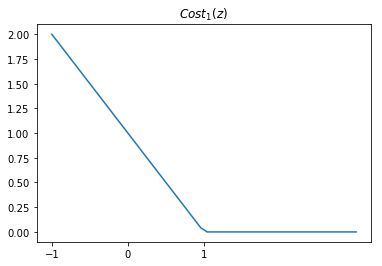

In [30]:
plt.show()

## 支持向量機（3）

- 當 $y = 0$ 時讓 $\theta^Tx \le -1$：

$$\text{minimize     }C\sum_{i=1}^{m}[(1-y)cost_0(\theta^Tx)] + \frac{1}{2}\sum_{i=1}^{n}\theta_j^2$$

In [31]:
plt.plot(x_arr_2, y_arr_2)
plt.xticks([-1, 0, 1])
plt.title("$Cost_2(z)$")

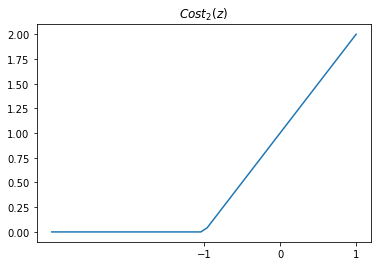

In [32]:
plt.show()

## 支持向量機（4）

- 成本函數可以簡化為：

$$\text{minimize     }C\times0 + \frac{1}{2}\sum_{j=1}^{n}\theta_j^2$$
$$\text{s.t. } \theta^Tx \ge 1 \text{ if } y = 1$$
$$\theta^Tx \le -1 \text{ if } y = 0$$

## 支持向量機（5）

- 我們可以接著將 $\theta^Tx$ 寫成 $p\|\theta\|$，其中 $\|\theta\|$ 是 $\theta$ 的長度 $\sqrt{\theta_1^2 + \theta_2^2 + \dots + \theta_n^2}$，而 $p$ 是 $x$ 在 $\theta$ 的投影

$$\text{minimize}\frac{1}{2}\sum_{j=1}^{n}\theta_j^2 = \frac{1}{2}(\sqrt{\theta_1^2 + \theta_2^2 + \dots + \theta_n^2})^2 = \frac{1}{2}\|\theta\|^2$$
$$\text{s.t. } p \| \theta \| \ge 1 \text{ if } y = 1$$
$$p \| \theta \| \le -1 \text{ if } y = 0$$

## 支持向量機（6）

![](http://www.bogotobogo.com/python/scikit-learn/images/svm/svm_diagram.png)

Source: [bogotobogo](http://www.bogotobogo.com/index.php)

## 支持向量機（7）

- 先看 $H_2$
    - $y = 0$，$p$ 小，為了讓 $p\| \theta \| \le -1$ 所以 $\|\theta\|$ 大
    - $y = 1$，$p$ 小，為了讓 $p\| \theta \| \ge 1$ 所以 $\|\theta\|$ 大

## 支持向量機（8）

- 再看 $H_3$
    - $y = 0$，$p$ 大，為了讓 $p\| \theta \| \le -1$ 所以 $\|\theta\|$ 可以較小
    - $y = 1$，$p$ 大，為了讓 $p\| \theta \| \ge 1$ 所以 $\|\theta\|$ 可以較小

- 而支持向量機的目標是：

$$\text{minimize     }\frac{1}{2}\|\theta\|^2$$

- 所以支持向量機會偏愛 $H_3$

In [33]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
ppn = SVC(kernel = "linear")
ppn.fit(X, y)
plot_decision_region(X, y, classifier = ppn)
plt.legend(loc = "upper left")
plt.title("Support Vector Machine")

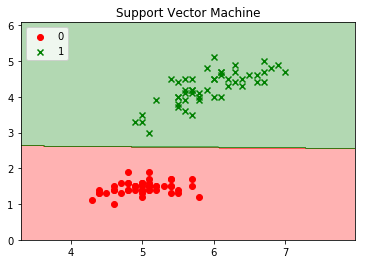

In [34]:
plt.show()

## 線性不可分

- 我們目前使用的分類器處理線性可分的資料表現得很不錯
- 但什麼樣的資料這些分類器會分得很差？

In [35]:
# 像是這樣子的資料：
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, random_state = 0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 'x', label = '1')
plt.legend()

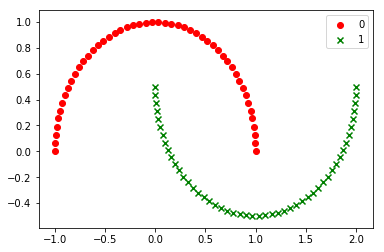

In [36]:
plt.show()

In [37]:
# 或是像這樣子的資料：
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 100, random_state = 0, factor = 0.5)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 'x', label = '1')
plt.legend()

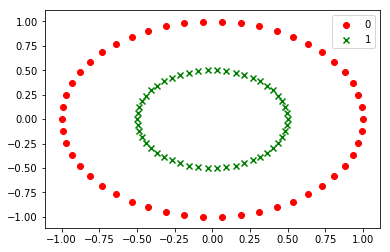

In [38]:
plt.show()

## 線性不可分（2）

- 面對線性不可分的資料，我們可以採取：
    - 核支持向量機（Kernel Support Vector Machine）
    - 決策樹（Decision Tree）
    - K 最近鄰（K-nearest neighbor，KNN）

## 核支持向量機

- 如同在迴歸問題中，我們必須加入次方項來產出彎曲的 Decision Boundary

$$\text{Predict y = 1 if} \quad \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_2^2 + \dots \ge 0$$

$$h(\theta) = \theta_0 + \theta_1f_1 + \theta_2f_2 + \dots$$

## 核支持向量機（2）

- 利用 Gaussian Kernels 核函數來衡量相似度

$$f_i = similarity(x, 1_i) = exp(-\frac{\|x-l_i\|^2}{2\sigma^2})$$

- 假如 $x \approx l_i$，$f_i \approx 1$
- 假如 $x$ 離 $l_i$ 很遠，$f_i \approx 0$

In [39]:
import matplotlib.pyplot as plt
import numpy as np

l_arr_x1 = np.array([1, 2, 4])
l_arr_x2 = np.array([4, 1, 2])
plt.scatter(l_arr_x1, l_arr_x2)
plt.xlim(l_arr_x1.min() - 2, l_arr_x1.max() + 2)
plt.ylim(l_arr_x2.min() - 2, l_arr_x2.max() + 2)
for i in range(3):
    plt.text(l_arr_x1[i] + 0.2, l_arr_x2[i] + 0.2, "$l$", size = 12)
plt.scatter([1.5, 3.5], [3.5, 2], c = "r")
plt.scatter([0, 5], [0, 0], c = "g", marker = "x")
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

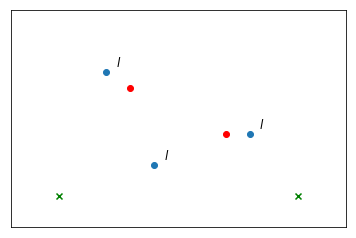

In [40]:
plt.show()

## 核支持向量機（3）

- $l$ 稱作 landmarks，讓 $l$ 的數目跟觀測值個數相同，因此觀測值個數會與特徵個數 $f$ 相同：

$$\text{minimize     }C\sum_{i=1}^{m}[ycost_1(\theta^Tf) + (1-y)cost_0(\theta^Tf)] + \frac{1}{2}\sum_{j=1}^{m}\theta_j^2$$

$$\text{where     }C = \frac{1}{\lambda}$$

## 核支持向量機（4）

- 參數調整：

|參數|Bias|Variance|
|---|----|--------|
|$C$ large|Low|High|
|$C$ small|High|Low|
|$\gamma$ large|Low|High|
|$\gamma$ small|High|Low|

$$C = \frac{1}{\lambda} \quad \gamma = \frac{1}{2\sigma^2}$$

In [41]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
svm = SVC(kernel = 'rbf', gamma = 0.2) # gamma = 0.2, 核函數 rbf
svm.fit(X_train, y_train)
plot_decision_region(X = X, y = y, classifier = svm)
plt.legend(loc = 'upper left')

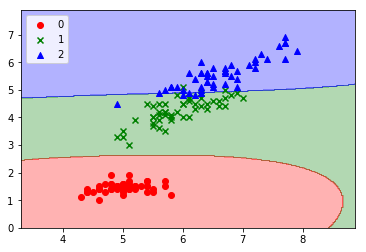

In [42]:
plt.show()

## 評估指標

- 分類演算法的評估指標：[混淆矩陣（Confusion Matrix）](https://en.wikipedia.org/wiki/Confusion_matrix)

|   |陽性|陰性|
|---|---|----|
|陽性|5|8|
|陰性|6|7|

- $\text{準確率（Accuracy）}= \frac{5 + 7}{5 + 6 + 7 + 8} = 0.52$
- $\text{錯誤率（Error）} = 1 - \text{Accuracy} = 1 - 0.5 = 0.48$

In [43]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


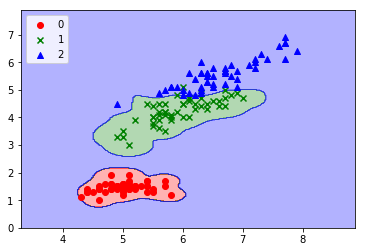

In [44]:
# 調整 gamma
svm = SVC(kernel = 'rbf', gamma = 20) # gamma = 20
svm.fit(X_train, y_train)

plot_decision_region(X = X, y = y, classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


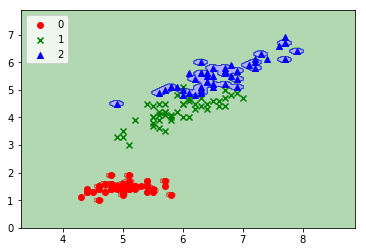

In [46]:
# 調整 gamma
svm = SVC(kernel = 'rbf', gamma = 200) # gamma = 200
svm.fit(X_train, y_train)

plot_decision_region(X = X, y = y, classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

In [47]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.56


## 評估指標（2）

- 調高 `gamma` 參數的過程，其實就是一個對訓練資料配適（fitting）的過程
- 過高的 `gamma` 參數可以讓訓練資料完美的分類，但對測試資料的預測反而下滑

# 決策樹

## 決策樹

- 好解釋的分類器
- 用不同的門檻值切分變數
- 以**最大化**資訊增益值為根據進行變數的切分

$$IG(D_p) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$$

## 決策樹（2）

- 資訊值有三種計算方式：
    - 錯誤率（Error）
    - 吉尼指標（Gini Index）
    - 熵（Entropy）（\*）

## 決策樹（3）

- 這三個計算方式都跟**錯誤率（Error）**計算有關

## 決策樹（4）

|計算方式|資訊值公式|
|-------|--------|
|錯誤率|$1 - \text{accuracy}$|
|吉尼指標|$1 - \text{accuracy}^2 - \text{error}^2$|
|熵|$-(\text{accuracy}\log_2(\text{accuracy}) + \text{error}\log_2(\text{error}))$|

## 決策樹（5）

![Decision Tree Metrics](https://storage.googleapis.com/py_ml_images/tree_metrics.png)

## 決策樹（6）

- 先計算各個節點的資訊值
- A 情況：

|計算方式|$I(D_p)$|$I(D_{left})$|$I(D_{right})$|
|-------|-----------|---------------|----------------|
|錯誤率|$40/80 = 0.5$|$10/40 = 0.25$|$10/40 = 0.25$|
|吉尼指標|$1-0.5^2-0.5^2 = 0.5$|$1-0.75^2-0.25^2 = 0.375$|$1-0.75^2-0.25^2 = 0.375$|
|熵|$-(0.5log_2(0.5)+0.5log_2(0.5)) = 1$|$-(0.75log_2(0.75)+0.25log_2(0.25)) = 0.81$|$-(0.75log_2(0.75)+0.25log_2(0.25)) = 0.81$|

## 決策樹（7）

- 先計算各個節點的資訊值
- B 情況：

|計算方式|$I(D_p)$|$I(D_{left})$|$I(D_{right})$|
|-------|-----------|---------------|----------------|
|錯誤率|$40/80 = 0.5$|$20/60 = 1/3$|$0/20 = 0$|
|吉尼指標|$1-0.5^2-0.5^2 = 0.5$|$1-(2/3)^2-(1/3)^2 = 1/3$|$1-1^2-0^2 = 0$|
|熵|$-(0.5log_2(0.5)+0.5log_2(0.5)) = 1$|$-(2/3log_2(2/3)+(1/3)log_2(1/3)) = 0.92$|$-(1log_2(1)+0log_2(0)) = 0$|

## 決策樹（8）

- 最後計算**資訊增益值**：

|計算方式|情況 A|情況 B|
|-------|-----|------|
|錯誤率|$0.5-\frac{40}{80}\times0.25-\frac{40}{80}\times0.25 = 0.25$|$0.5-\frac{6}{8}\times\frac{1}{3}-0=0.25$|
|吉尼指標|$0.5-\frac{4}{8}\times0.375-\frac{4}{8}\times0.375=0.125$|$1-\frac{6}{8}\times0.\bar{4}-0=0.1\bar{6}$|
|熵|$0.5-\frac{4}{8}\times0.81-\frac{4}{8}\times0.81=0.125$|$1-\frac{6}{8}\times0.92-0=0.31$|

- 實務使用熵（Entropy）居多

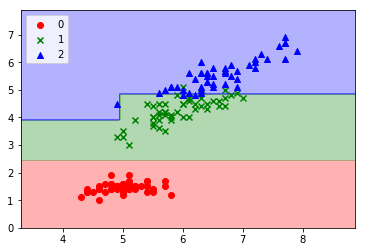

In [48]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
tree.fit(X_train, y_train)
plot_decision_region(X = X, y = y, classifier = tree)
plt.legend(loc = 'upper left')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


## 決策樹（9）

- 假如想要畫出分支圖，需要另外安裝[GraphViz](http://www.graphviz.org/)

![GraphViz Decision Tree](https://storage.googleapis.com/py_ml_images/tree_graphviz.png)

# K 最近鄰

## K 最近鄰

![knn](https://storage.googleapis.com/py_ml_images/knn.png)

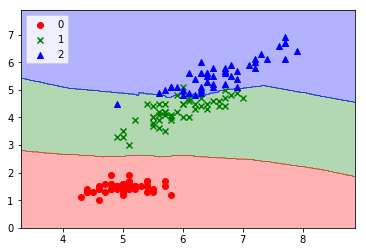

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default 5
knn.fit(X_train, y_train)
plot_decision_region(X = X, y = y, classifier = knn) # 換分類器
plt.legend(loc = 'upper left')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


# 整體學習

## 整體學習

- 將數個分類器的預測結果綜合考慮
- 以一題是非題來說，假如我們使用一個銅板來決定答案要填是還是非，答對的機率是 50%
- 使用 3 個銅板來決定答案，答對的機率是 $1-(50\%)^3=87.5\%$，如果銅板的數目來到 5 枚，答對的機率是 $1-(50\%)^5=96.875\%$

## 整體學習（2）

- 多數決（Majority Voting）

例如：

分類器 1 -> class 1

分類器 2 -> class 1

分類器 3 -> class 2

分類標籤：**class 1**

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
knn = KNeighborsClassifier()
svc = SVC(kernel='rbf')
eclf = VotingClassifier(estimators=[('tree', tree), ('knn', knn), ('svc', svc)])

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
eclf.fit(X_train, y_train)

titles = ['Decision Tree', 'KNN', 'Kernel SVM', 'Majority Voting']
clfs = [tree, knn, svc, eclf]
for title, clf in zip(titles, clfs):
    y_pred = clf.predict(X_test)
    print "Accuracy of %s: %.4f" % (title, accuracy_score(y_test, y_pred))

Accuracy of Decision Tree: 0.9333
Accuracy of KNN: 0.9333
Accuracy of Kernel SVM: 0.9333
Accuracy of Majority Voting: 0.9333


## 整體學習（3）

- 隨機森林（Random Forest）
    - 用 **Sampling with replacement** 的方式選出 m 個觀測值
    - 隨機選 n 個變數
    - 建出多個決策樹
    - 讓多個決策樹進行多數決

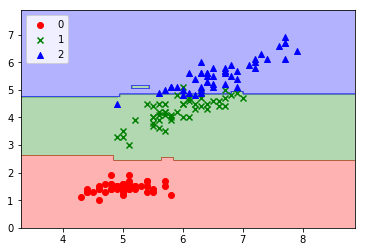

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(max_depth = 4, n_estimators = 100)
forest.fit(X_train, y_train)
plot_decision_region(X = X, y = y, classifier = forest) # 換分類器
plt.legend(loc = 'upper left')
plt.show()

In [54]:
y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


# 分群問題

## 分群問題

- 處理沒有標籤的資料
- 沒有對與錯
- 掌握組內差異小、組間差異大
- 以觀測值之間的距離作為度量

## 分群問題（2）

- 性別（2 群）
- 血型（4 群）
- 星座（12 群）

## 分群問題（3）

- 與分類問題的比較：

$$\text{Training set: } (x_i, y_i)$$

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random

x1_arr = np.linspace(0, 3, 100)
x_points = np.linspace(0, 3, 20)
x_points_len = int(len(x_points) / 2)
y_minus = np.array(random.sample(np.arange(1, 2, 0.01), k = x_points_len)) - x_points[:x_points_len]
y_plus = np.array(random.sample(np.arange(4, 6, 0.01), k = x_points_len)) - x_points[x_points_len:]
plt.scatter(x_points[:x_points_len], y_minus, marker = '_', s = 200)
plt.scatter(x_points[x_points_len:], y_plus, marker = '+', c = 'r', s = 200)
plt.plot(x1_arr, 3 - x1_arr, c = 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Classification")

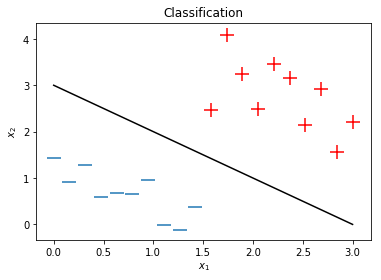

In [56]:
plt.show()

## 分群問題（4）

- 與分類問題比較

$$\text{Training set: } x_i$$

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import random

x1_arr = np.linspace(0, 3, 100)
x_points = np.linspace(0, 3, 10)
x_points_len = int(len(x_points) / 2)
random.seed(123)
y_minus = np.array(random.sample(np.arange(1, 2, 0.01), k = x_points_len)) - x_points[:x_points_len]
y_plus = np.array(random.sample(np.arange(4, 6, 0.01), k = x_points_len)) - x_points[x_points_len:]
fig, ax = plt.subplots()
ax.scatter(x_points[:x_points_len], y_minus, s = 200, c = 'r')
ax.scatter(x_points[x_points_len:], y_plus, s = 200, c = 'b')
circle1 = plt.Circle((0.5, 0.5), 1, color = 'r', fill = False)
circle2 = plt.Circle((2.5, 2.2), 1.2, color = 'b', fill = False)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 4)
ax.set_title("Clustering")

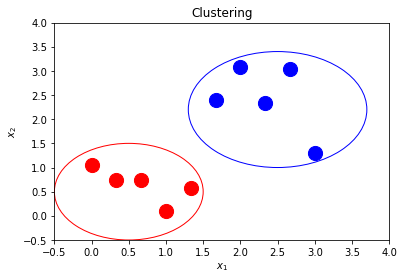

In [58]:
plt.show()

## 分群問題（5）

- K-means 分群方法的成本函數

$$c: \; \text{分群的索引值}$$
$$\mu_k: \; \text{不同分群的中心點}$$
$$\mu_c: \; \text{計算距離後收斂的不同分群中心點}$$
$$\text{minimize:} \; J(c, \mu_k) = \frac{1}{m}\sum_{i = 1}^{m}(x_i-\mu_c)^2$$

## 分群問題（6）

- K-means 演算的方式

![Stanford.edu：K-Means 視覺化](http://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

Source: [Stanford.edu](https://www.stanford.edu/)

## 分群問題（7）

- 初始 $K$ 個中心點的位置對結果有決定性的影響

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.sample(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.sample(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.sample(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, s = 100, c = 'k')
plt.scatter(x_arr[3:7], y_arr_2, s = 100, c = 'k')
plt.scatter(x_arr[7:], y_arr_3, s = 100, c = 'k')

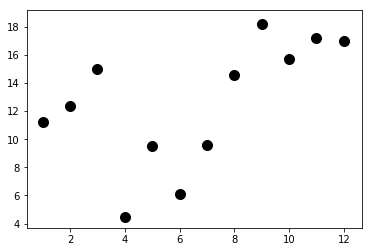

In [60]:
plt.show()

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.sample(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.sample(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.sample(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, s = 100, c = 'r')
plt.scatter(x_arr[3:7], y_arr_2, s = 100, c = 'g')
plt.scatter(x_arr[7:], y_arr_3, s = 100, c = 'b')
plt.plot(2, 14, marker = 'X', markersize = 20, c = 'r')
plt.plot(5, 8, marker = 'X', markersize = 20, c = 'g')
plt.plot(10, 18, marker = 'X', markersize = 20, c = 'b')

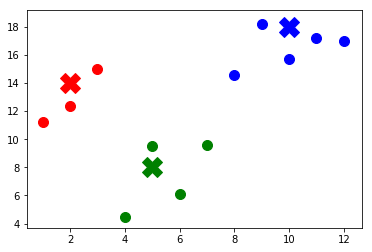

In [62]:
plt.show()

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.sample(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.sample(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.sample(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, s = 100, c = 'r')
plt.scatter(x_arr[3:7], y_arr_2, s = 100, c = 'r')
plt.scatter(x_arr[7:10], y_arr_3[:3], s = 100, c = 'g')
plt.scatter(x_arr[10:], y_arr_3[3:], s = 100, c = 'b')
plt.plot(3, 10, marker = 'X', markersize = 20, c = 'r')
plt.plot(9, 16, marker = 'X', markersize = 20, c = 'g')
plt.plot(11.5, 18, marker = 'X', markersize = 20, c = 'b')

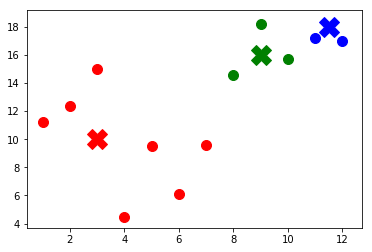

In [64]:
plt.show()

## 分群問題（8）

- 透過多進行幾次初始化 $K$ 個中心點的位置來進行校正
- 從多次的分群中選擇一個 $J(c, \mu_k)$ 最小的分群

## 分群問題（9）

- 如何選擇一個合適的 $K$？
    - 性別（2 群）
    - 血型（4 群）
    - 星座（12 群）
    - 出生月日（366 群）
    - DNA（75+ 億群）

## 分群問題（10）

- 利用陡坡圖（Scree plot）尋找手肘點（Elbow point）

In [65]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 1, 0.1)
y1 = -np.log(x)
plt.plot(x, y1, marker = 's')
plt.plot(x[[2, 3]], y1[[2, 3]], c = 'r', marker = 'X', lw = 0, markersize = 10)
plt.xticks(x, range(1, 10))
plt.xlabel("Number of clusters")
plt.ylabel("$J(c, \mu_k)$")

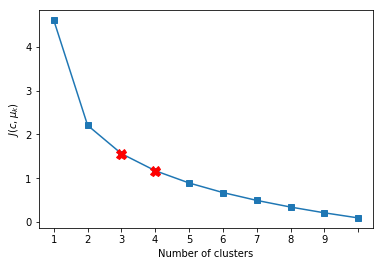

In [66]:
plt.show()

## 參考連結

- [Machine Learning Foundations (機器學習基石)](https://www.youtube.com/playlist?list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf)
- [Machine Learning Techniques (機器學習技法)](https://www.youtube.com/playlist?list=PLXVfgk9fNX2IQOYPmqjqWsNUFl2kpk1U2)
- [Coursera Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome)

## 作業

1. （延續上次作業）將 https://storage.googleapis.com/py_ml_datasets/train.csv 中的 `Sex` 與 `Embarked` 由類別型變數轉換為 One-hot encoding 的 dummy variables
2. 將 `Age` 的遺漏值以中位數填補
3. 將 `Embarked` 的遺漏值以 S 填補 
4. 將資料以 7:3 比例分割成訓練與測試資料
5. 任意選三個分類器利用訓練資料建立 $h$
6. 比較這三個分類器在測試資料的準確率